#### Linear Model

Code to create the synthetic images for linear motion.

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Parameters
num_frames = 100
image_size = (512, 512)
velocity = 2.5
tracer_radius = 3
num_particles = 1000
output_folder = 'linear'

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Generate particle initial positions
positions = np.random.randint(0, min(image_size), size=(num_particles, 2))

# Create synthetic images
for frame in range(num_frames):
    # Create an empty image
    image = np.zeros((*image_size, 3), dtype=np.uint8)

    # Update particle positions
    updated_positions = positions.copy()
    updated_positions[:, 0] += (velocity * np.array([frame])).astype(int)  # Fix the error by wrapping 'frame' in a NumPy array

    # Draw tracer particles on the image
    for pos in updated_positions:
        cv2.circle(image, tuple(pos), tracer_radius, (255, 255, 255), -1)

    # Save the image
    cv2.imwrite(os.path.join(output_folder, f'image_{frame:04d}.png'), image)

Comparitive Analysis for Linear motion

In [2]:
pixel_to_mm = 0.352734375

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
csv_file = 'data_p1/linear2.csv'
expected_velocity_pixels = 2.5
expected_velocity = 2.5* pixel_to_mm
fig_size = (12, 6)

# Import the CSV file
results_df = pd.read_csv(csv_file)

# Extract the time values and measured velocities
time_values = results_df.index
measured_velocities = results_df['vec']* pixel_to_mm
measured_displacements_x = results_df['vecx'] * pixel_to_mm
measured_displacements_y = results_df['vecy'] * pixel_to_mm

cum_displacement_x = measured_displacements_x.cumsum()
cum_displacement_y = measured_displacements_y.cumsum()

# Create the expected displacement and velocity arrays
expected_displacements_x = [expected_velocity * t for t in time_values] 
expected_displacements_y = [0] * len(time_values) 
expected_velocities = [expected_velocity] * len(time_values)


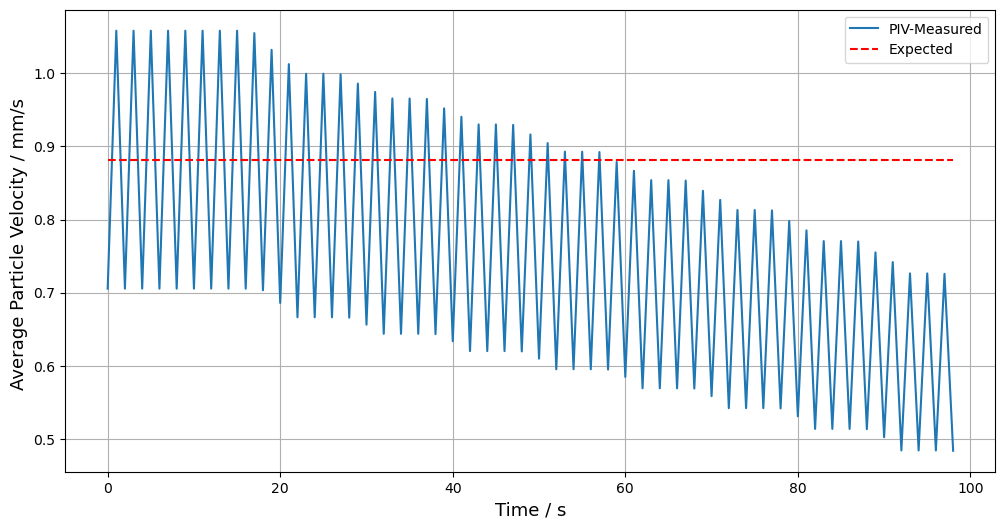

In [21]:
# Create the plot
plt.figure(figsize=fig_size)
plt.plot(time_values, measured_velocities, label='PIV-Measured')
plt.plot(time_values, expected_velocities, label='Expected', linestyle='--', c = "red")

plt.xlabel('Time / s', fontsize=13)
plt.ylabel('Average Particle Velocity / mm/s ', fontsize=13)
#plt.title('Measured and Expected Velocities for Linear Motion')
plt.legend()
plt.grid()


# Show the plot
plt.show()

In [5]:
from scipy.stats import linregress
linregress(time_values, expected_displacements_x)

LinregressResult(slope=0.8818359375000001, intercept=-7.105427357601002e-15, rvalue=1.0, pvalue=0.0, stderr=0.0, intercept_stderr=0.0)

In [6]:
from scipy.stats import linregress
linregress(time_values, cum_displacement_x)

LinregressResult(slope=0.7590267206735908, intercept=3.196300544670116, rvalue=0.9985462835455764, pvalue=7.463780698995362e-125, stderr=0.004160063468361358, intercept_stderr=0.2359774383077413)

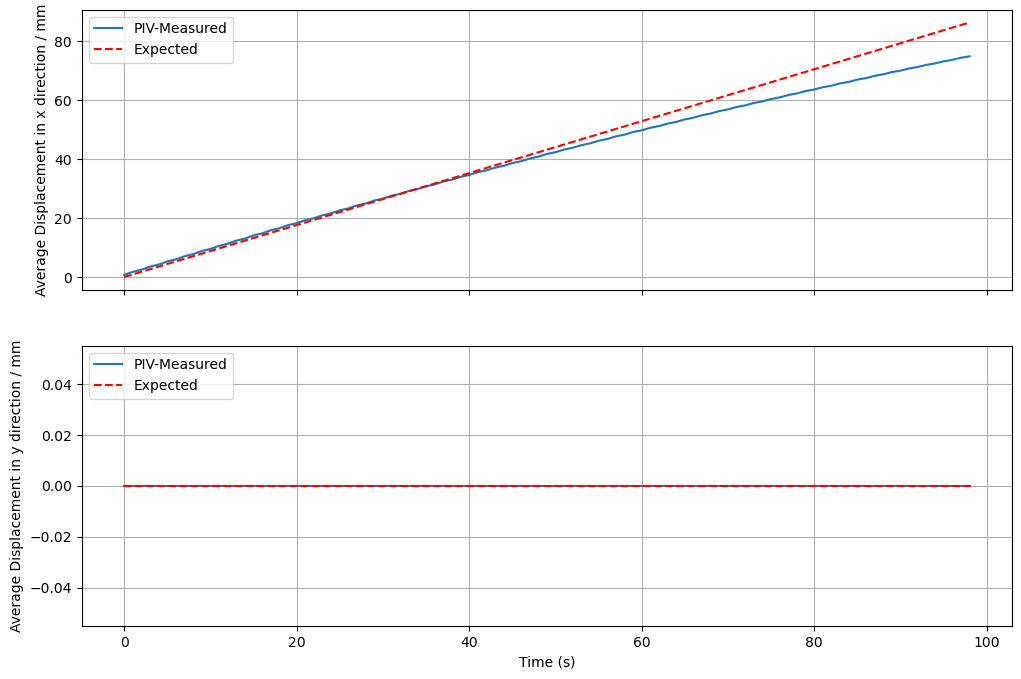

In [22]:
# Create the displacement plots
fig_size = (12, 8)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=fig_size, sharex=True)
ax1.plot(time_values, cum_displacement_x, label='PIV-Measured')
ax1.plot(time_values, expected_displacements_x, label='Expected', linestyle='--', c="red")
ax1.set(ylabel='Average Displacement in x direction / mm')
ax1.legend(loc='upper left')
ax1.grid()

ax2.plot(time_values, cum_displacement_y, label='PIV-Measured')
ax2.plot(time_values, expected_displacements_y, label='Expected', linestyle='--', c="red")
ax2.set(xlabel='Time (s)', ylabel='Average Displacement in y direction / mm')
ax2.legend(loc='upper left')
ax2.grid()

plt.show()



In [8]:
#Print Average Values:

print (f"Expected Velocity (pixels/frame): {expected_velocity_pixels}")
print (f"Average Velocity (pixels/frame): {np.mean(measured_velocities)/pixel_to_mm}")

Expected Velocity (pixels/frame): 2.5
Average Velocity (pixels/frame): 2.1456691081482244


In [9]:
print (f"Expected Velocity (m/frame): {np.mean(expected_velocities)}")
print (f"Average Velocity (m/frame): {np.std(measured_velocities)}")

Expected Velocity (m/frame): 0.8818359375
Average Velocity (m/frame): 0.17685527305624


In [10]:
#RMSE calculations 
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(expected_velocities, measured_velocities)
print(f"Mean Absolute Error (MAE): {mae:}")

# Calculate the mean squared error (MSE)
mse = mean_squared_error(expected_velocities, measured_velocities)
print(f"Mean Squared Error (MSE): {mse:}")

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:}")

Mean Absolute Error (MAE): 0.18612620668444188
Mean Squared Error (MSE): 0.04689895926245788
Root Mean Squared Error (RMSE): 0.21656167542401836


In [11]:
#RMSE calculations 
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(cum_displacement_x, expected_displacements_x)
print(f"Mean Absolute Error (MAE): {mae:}")

# Calculate the mean squared error (MSE)
mse = mean_squared_error(cum_displacement_x, expected_displacements_x)
print(f"Mean Squared Error (MSE): {mse:}")

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:}")

Mean Absolute Error (MAE): 3.257713924106373
Mean Squared Error (MSE): 21.64800707914503
Root Mean Squared Error (RMSE): 4.652741888300385


In [12]:
#RMSE calculations 
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate the mean absolute error (MAE)
mae = mean_absolute_error(cum_displacement_y, expected_displacements_y)
print(f"Mean Absolute Error (MAE): {mae:}")

# Calculate the mean squared error (MSE)
mse = mean_squared_error(cum_displacement_y, expected_displacements_y)
print(f"Mean Squared Error (MSE): {mse:}")

# Calculate the root mean squared error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:}")

Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
